In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

import time


### **Load the data:**

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (60000, 28, 28)
Test set: (10000, 28, 28)


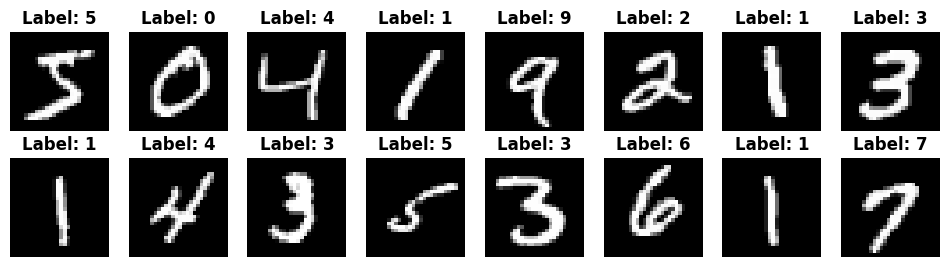

In [3]:

fig, axes = plt.subplots(2, 8, figsize=(12, 3))

for i in range(16):

    ax = axes[i // 8, i % 8]
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {y_train[i]}', fontweight = 'bold')
plt.show()

In [4]:
X_train = X_train.reshape(-1,28,28,1)
X_test  = X_test.reshape(-1,28,28,1)
X_train = X_train / 255
X_test  = X_test / 255
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

### **Modeling:**

In [5]:
def relu (X) :
    return tf.nn.relu(X)

def Conv2D(X, weight_shape):
    weights = tf.Variable(tf.random.normal(weight_shape))
    conv_matrix = tf.nn.conv2d(input=X, filters=weights, strides=[1,1,1,1], padding='SAME')
    return relu(conv_matrix)

def MaxPool(x, k, stride):
    return tf.nn.max_pool(x, ksize=k, strides=stride, padding='SAME')

def Dropout(x, prob):
    return tf.nn.dropout(x, prob)

def Dense(x, size):
    weights = tf.Variable(tf.random.normal([int(x.get_shape()[1]), size], mean=0, stddev=1))
    return tf.matmul(x, weights)

def Softmax(x):
  return tf.nn.softmax(x)

def CrossEntropy(predicted, y):
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predicted, labels=y))

In [6]:


def convolutional_neural_network(x):

    # Hidden layer 1
    conv_layer_1 = Conv2D(x, [3,3,1,32])
    max_pool_layer_1 = MaxPool(conv_layer_1, [1,2,2,1], [1,2,2,1])

    # Hidden layer 2
    conv_layer_2 = Conv2D(max_pool_layer_1, [3,3,32,64])
    max_pool_layer_2 = MaxPool(conv_layer_2, [1,2,2,1], [1,2,2,1])

    # Drop out layer to prevent overfitting
    dropout_layer = Dropout(max_pool_layer_2, 0.75)

    flatten_layer = tf.reshape(dropout_layer, [-1, 7*7*64])
    output_layer = Dense(flatten_layer, 10)

    return output_layer


In [7]:
max_epoch = 10
batch_size = 32
tf.reset_default_graph()
input = tf.placeholder(dtype=tf.float32, shape=(None,28,28,1), name='input')
output = tf.placeholder(dtype=tf.float32, shape=(None,10), name='output')

def train_neural_network(x):

    prediction = convolutional_neural_network(x)
    cost = CrossEntropy(prediction, output)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
    correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(output, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        indices = np.arange(len(X_train))

        for epoch in range(max_epoch):
    
            for i in range(0, len(X_train),  batch_size):

                epoch_x = X_train[indices[i : i+batch_size]]
                epoch_y = y_train[indices[i : i+batch_size]]
                a,b,c = sess.run([accuracy, optimizer, cost], feed_dict={input: epoch_x, output: epoch_y})

            result = sess.run([cost, accuracy],feed_dict={input:X_test, output:y_test})
            print(f'Epoch [{epoch}/{max_epoch}], Accuracy_test: {result[1]}  Loss: {result[0]}')

        print('Accuracy:',accuracy.eval({input:X_test, output:y_test}))
    

In [8]:
start_time = time.time()

train_neural_network(input)
end_time = time.time()
print(f'CNN training time with with TensorFlow: {end_time - start_time}')


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.


Epoch [0/10], Accuracy_test: 0.917900025844574  Loss: 1.9647804498672485
Epoch [1/10], Accuracy_test: 0.9200999736785889  Loss: 0.638754665851593
Epoch [2/10], Accuracy_test: 0.9381999969482422  Loss: 0.3331267833709717
Epoch [3/10], Accuracy_test: 0.9379000067710876  Loss: 0.2615263760089874
Epoch [4/10], Accuracy_test: 0.9391000270843506  Loss: 0.25692182779312134
Epoch [5/10], Accuracy_test: 0.9505000114440918  Loss: 0.19345460832118988
Epoch [6/10], Accuracy_test: 0.9370999932289124  Loss: 0.25403720140457153
Epoch [7/10], Accuracy_test: 0.9480999708175659  Loss: 0.1840047538280487
Epoch [8/10], Accuracy_test: 0.9634000062942505  Loss: 0.13078442215919495
Epoch [9/10], Accuracy_t